# Advanced Data Science Capstone Project - ETL - Version 2

In this Jupyer notebook, an investigation in regards the data that will be in the rest of this project. It will be investigated the data types of the variables, if needed, a data type conversion might occur, togheter with the assesement of basic statistical metrics, such as standard deviation and mean. The data that will be used in this capstone project will be from the New York City and will be about the COVID - 19 cases in the city. Source:https://dev.socrata.com/foundry/data.cityofnewyork.us/rc75-m7u3

## Installing and Importing Libraries

First, we must install the packages that will assist in this ETL process. The packages will be pandas and sodapy, the sodapy package will allow the script to import the data from NYC database using HTTP requests. Sodapy documentation can be here: https://pypi.org/project/sodapy/

In [1]:
!pip install pandas
!pip install sodapy
!pip install numpy
!pip install tensorflow


/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/envs/Python-3.7-OpenCE/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: 

For the moment only the libraries that are present in the cell below gonna be improted in the script, but further in development more libraries might be added. 

In [2]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# A couple  of tensorflow modules must be imported to create the LSTM forecasting model
# This line wil enable to create a sequence of LSTM cells
from tensorflow.keras.preprocessing import sequence 
# Enables the creation of a Input, Dense layers and a LSTM cells
from tensorflow.keras.layers import Input, LSTM, Dense 
from tensorflow.keras.models import Model
# Framework for making HTTP requests to a Socrata Data Base
from sodapy import Socrata
# Framework for making HTTP simple requests 
import requests
# The io module provides Python’s main facilities for dealing with various types of I/O
import io
# This module provides access to the mathematical functions defined by the C standard
import math

## Fetching the data from data bases

To fetch the data, the first step is to authenticate and connect with the database, which in this project is the NYC database. Since it is a public dataset there is no need to authenticate with username or passwords, only with the address. The following step is the make an HTTP ger request with the description of the desired data. Then, just convert the into a pandas dataframe to facilitate subsequent work.

In [3]:
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofnewyork.us,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("rc75-m7u3", limit=2000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

Now the population data for the city of New York will downloaded as well using th esame procedure as the cell above

In [4]:
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cityofnewyork.us", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.cityofnewyork.us,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("ph5g-sr3v", limit=2000)

# Convert to pandas DataFrame
population_df = pd.DataFrame.from_records(results)

Just going to print both dataframes to check if the data there isn't something visibly wrong with the data, as enconding.

In [5]:
results_df ## This line is only to check if the dataset was correctly imported 

,date_of_interest,case_count,probable_case_count,hospitalized_count,death_count,death_count_probable,case_count_7day_avg,all_case_count_7day_avg,hosp_count_7day_avg,death_count_7day_avg,...,si_probable_case_count,si_hospitalized_count,si_death_count,si_probable_death_count,si_case_count_7day_avg,si_all_case_count_7day_avg,si_hospitalized_count_7day_avg,si_death_count_7day_avg,si_all_death_count_7day_avg,incomplete
0,2020-02-29T00:00:00.000,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2020-03-01T00:00:00.000,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2020-03-02T00:00:00.000,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2020-03-03T00:00:00.000,1,0,7,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2020-03-04T00:00:00.000,5,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,2021-10-19T00:00:00.000,738,212,38,11,0,789,1052,46,8,...,14,2,1,0,82,102,4,1,1,11000
599,2021-10-20T00:00:00.000,737,207,38,6,1,738,988,42,8,...,13,2,0,0,75,93,3,1,1,11000
600,2021-10-21T00:00:00.000,646,207,32,7,2,687,922,40,7,...,14,6,1,0,70,88,3,1,1,11000
601,2021-10-22T00:00:00.000,534,176,18,6,2,643,865,36,7,...,13,2,2,0,68,84,3,1,1,11000


In [6]:
population_df

,age_group,borough,_1,_of_total_borough_population_2000,_2,_of_total_borough_population_2010,_3,_of_total_borough_population_2020,_4,_of_total_borough_population_2030,change_in_number_2000_2010,change_in_percent_2000_2010,change_in_number_2010_2020_,change_in_percent_2010_2020,change_in_number_2020_2030_,change_in_percent_2020_2030,change_in_number_2000_2030_,change_in_percent_2000_2030
0,Total,New York City,8242624,100.00,8550971,100.00,8821027,100.00,9025145,100.00,308347,3.74,270056,3.16,204118,2.31,782521,9.49
1,Total,Bronx,1385108,100.00,1446788,100.00,1518998,100.00,1579245,100.00,61680,4.45,72210,4.99,60247,3.97,194137,14.02
2,Total,Brooklyn,2552911,100.00,2648452,100.00,2754009,100.00,2840525,100.00,95541,3.74,105557,3.99,86516,3.14,287614,11.27
3,Total,Manhattan,1585873,100.00,1638281,100.00,1676720,100.00,1691617,100.00,52408,3.30,38439,2,14897,0.89,105744,6.67
4,Total,Queens,2250002,100.00,2330295,100.00,2373551,100.00,2412649,100.00,80293,3.57,43256,1.86,39098,2,162647,7.23
5,Total,Staten Island,468730,100.00,487155,100.00,497749,100.00,501109,100.00,18425,3.93,10594,2.17,3360,0.68,32379,6.91
6,School-Age (5 to17),New York City,1260400,15.29,1282814,15.00,1347036,15.27,1342097,14.87,22415,1.78,64222,5.01,-4939,-0.37,81697,6.48
7,School-Age (5 to17),Bronx,265052,19.14,259013,17.90,277830,18.29,281688,17.84,-6039,-2.28,18817,7.26,3858,1.39,16636,6.28
8,School-Age (5 to17),Brooklyn,424704,16.64,441049,16.65,461688,16.76,454949,16.02,16345,3.85,20639,4.68,-6739,-1.46,30245,7.12
9,School-Age (5 to17),Manhattan,157856,9.95,162931,9.95,177440,10.58,170114,10.06,5075,3.21,14509,8.90,-7326,-4.13,12258,7.77


## Data Quality Assessment and Exploration

In the process of trasforming and preparing the data for model training is important to check if everything in order with the dataset, if all the variables are the datatype they supposed to be, the range, stantard deviation and other indicator.To begin with, first the datatypes are checked to see if they are correct.

In [7]:
results_df.dtypes

date_of_interest                  object
case_count                        object
probable_case_count               object
hospitalized_count                object
death_count                       object
                                   ...  
si_all_case_count_7day_avg        object
si_hospitalized_count_7day_avg    object
si_death_count_7day_avg           object
si_all_death_count_7day_avg       object
incomplete                        object
Length: 62, dtype: object

As stated in the Covid-19 database for the NYC, data_of_interest variable is datetime and all of the rest are number, in this case it will be assumed float. The variable will converted to the correct data type in the next cell.

In [8]:
res = {key:np.float for key in results_df.columns[1:-1]}
results_df = results_df.astype(res)
results_df['date_of_interest']= pd.to_datetime(results_df['date_of_interest'])
results_df.dtypes

date_of_interest                  datetime64[ns]
case_count                               float64
probable_case_count                      float64
hospitalized_count                       float64
death_count                              float64
                                       ...      
si_all_case_count_7day_avg               float64
si_hospitalized_count_7day_avg           float64
si_death_count_7day_avg                  float64
si_all_death_count_7day_avg              float64
incomplete                                object
Length: 62, dtype: object

Now that all of the variables are in the correct datatype, the next step is to check basic statistical indicators of the data to check if the data are within the expected range

In [9]:
results_df.describe()

,case_count,probable_case_count,hospitalized_count,death_count,death_count_probable,case_count_7day_avg,all_case_count_7day_avg,hosp_count_7day_avg,death_count_7day_avg,all_death_count_7day_avg,...,si_case_count,si_probable_case_count,si_hospitalized_count,si_death_count,si_probable_death_count,si_case_count_7day_avg,si_all_case_count_7day_avg,si_hospitalized_count_7day_avg,si_death_count_7day_avg,si_all_death_count_7day_avg
count,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,...,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000,603.000000
mean,1513.616915,338.868988,186.184080,48.638474,8.542289,1510.834163,1848.824212,186.056385,48.593698,57.117745,...,123.356551,24.897181,10.772803,2.860697,0.356551,123.016584,147.867330,10.764511,2.825871,3.190713
std,1476.680687,375.526462,289.131184,98.414197,30.236325,1392.345370,1681.647998,284.582658,97.268982,126.031351,...,124.643454,28.229294,13.207007,4.769487,1.245818,116.770680,138.839419,12.757159,4.513677,5.550892
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.000000,27.500000,40.000000,6.000000,0.000000,348.000000,378.000000,40.000000,6.000000,7.000000,...,25.000000,2.000000,2.000000,0.000000,0.000000,24.000000,27.000000,2.000000,0.000000,0.000000
50%,967.000000,183.000000,78.000000,13.000000,1.000000,1031.000000,1292.000000,80.000000,12.000000,13.000000,...,79.000000,13.000000,5.000000,1.000000,0.000000,82.000000,103.000000,6.000000,1.000000,1.000000
75%,2293.000000,521.000000,244.000000,49.000000,3.000000,2704.000000,3388.000000,258.500000,51.000000,53.000000,...,193.000000,44.000000,16.000000,4.000000,0.000000,207.500000,254.500000,16.000000,4.000000,4.000000
max,6589.000000,1418.000000,1848.000000,598.000000,224.000000,5290.000000,6447.000000,1670.000000,566.000000,761.000000,...,730.000000,143.000000,83.000000,34.000000,9.000000,506.000000,604.000000,71.000000,26.000000,33.000000


Another step in checking if the data is in the correct format is to ckeck if all there are null values within the data set. For this data set there are no null values.

In [10]:
null_percentage = results_df.isnull().sum()/results_df.count()*100
null_percentage.sort_values(ascending = False)
null_percentage.head()

date_of_interest       0.0
case_count             0.0
probable_case_count    0.0
hospitalized_count     0.0
death_count            0.0
dtype: float64

A scatter plot will be plotted as another tool to check if the data is everything is correct with the data.

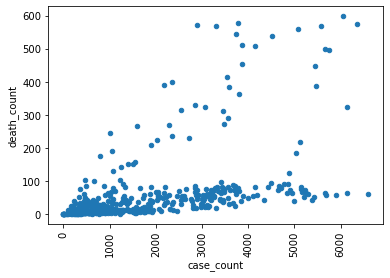

In [11]:
results_df.plot.scatter(x ='case_count' , y = 'death_count', rot = 90)

The process of converting the variable used in the cells above will be repeated for the population table

In [12]:
res = {key:np.float for key in population_df.columns[2:-1]}
population_df = population_df.astype(res)
population_df.dtypes

age_group                             object
borough                               object
_1                                   float64
_of_total_borough_population_2000    float64
_2                                   float64
_of_total_borough_population_2010    float64
_3                                   float64
_of_total_borough_population_2020    float64
_4                                   float64
_of_total_borough_population_2030    float64
change_in_number_2000_2010           float64
change_in_percent_2000_2010          float64
change_in_number_2010_2020_          float64
change_in_percent_2010_2020          float64
change_in_number_2020_2030_          float64
change_in_percent_2020_2030          float64
change_in_number_2000_2030_          float64
change_in_percent_2000_2030           object
dtype: object

In [13]:
null_percentage = population_df.isnull().sum()/population_df.count()*100
null_percentage.sort_values(ascending = False)
null_percentage.head()

age_group                            0.0
borough                              0.0
_1                                   0.0
_of_total_borough_population_2000    0.0
_2                                   0.0
dtype: float64

In [14]:
url = "https://raw.githubusercontent.com/nychealth/covid-vaccine-data/main/doses/doses-by-day.csv" # Make sure the url is the raw version of the file on GitHub

df = pd.read_csv(url,index_col=0,parse_dates=[0])

df_vaccine = df[['ADMIN_DOSE1_CUMULATIVE','ADMIN_DOSE2_CUMULATIVE','ADMIN_SINGLE_CUMULATIVE']]
df_vaccine.dtypes

ADMIN_DOSE1_CUMULATIVE     int64
ADMIN_DOSE2_CUMULATIVE     int64
ADMIN_SINGLE_CUMULATIVE    int64
dtype: object

Since all the variable are already converted to the correct types the project will move to Feature Engineering stage

## Feature Engineering

Since one of the objectives in this project is to investigate the relation between covid cases and the number of vaccinated people in the NYC, in the next cell the data for the vaccinated people will imported. And this data will merged with the already existing data regarding COVID 19 infection and new columns with the percentage of vaccinated population in NYC will appended to the data set.

After the data is imported, the dataframe containing the vaccination data and covid-19 related information will be merged  in a single dataframe. For that to occur, some data wrangling will be done. First, the data_of_interest columns will set as index and using this new set index, a concatenation will done using the inner command, so all data with the same index will be preserved. After concatenated, the index will droped so it can be used in the modeling stage.

In [15]:
results_df =  results_df.set_index('date_of_interest')
df_data = pd.concat([results_df,df_vaccine],axis = 1, join = 'inner')
df_data.reset_index(inplace=True)
#results_df

In [16]:
results_df.reset_index(inplace=True)
results_df

,date_of_interest,case_count,probable_case_count,hospitalized_count,death_count,death_count_probable,case_count_7day_avg,all_case_count_7day_avg,hosp_count_7day_avg,death_count_7day_avg,...,si_probable_case_count,si_hospitalized_count,si_death_count,si_probable_death_count,si_case_count_7day_avg,si_all_case_count_7day_avg,si_hospitalized_count_7day_avg,si_death_count_7day_avg,si_all_death_count_7day_avg,incomplete
0,2020-02-29,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,2020-03-01,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2020-03-02,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,2020-03-03,1.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,2020-03-04,5.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
598,2021-10-19,738.0,212.0,38.0,11.0,0.0,789.0,1052.0,46.0,8.0,...,14.0,2.0,1.0,0.0,82.0,102.0,4.0,1.0,1.0,11000
599,2021-10-20,737.0,207.0,38.0,6.0,1.0,738.0,988.0,42.0,8.0,...,13.0,2.0,0.0,0.0,75.0,93.0,3.0,1.0,1.0,11000
600,2021-10-21,646.0,207.0,32.0,7.0,2.0,687.0,922.0,40.0,7.0,...,14.0,6.0,1.0,0.0,70.0,88.0,3.0,1.0,1.0,11000
601,2021-10-22,534.0,176.0,18.0,6.0,2.0,643.0,865.0,36.0,7.0,...,13.0,2.0,2.0,0.0,68.0,84.0,3.0,1.0,1.0,11000


In the next cell, the index columns will be renamed to date.

In [17]:
df_data.rename(columns={'index': 'date'}, inplace=True)
df_data

,date,case_count,probable_case_count,hospitalized_count,death_count,death_count_probable,case_count_7day_avg,all_case_count_7day_avg,hosp_count_7day_avg,death_count_7day_avg,...,si_probable_death_count,si_case_count_7day_avg,si_all_case_count_7day_avg,si_hospitalized_count_7day_avg,si_death_count_7day_avg,si_all_death_count_7day_avg,incomplete,ADMIN_DOSE1_CUMULATIVE,ADMIN_DOSE2_CUMULATIVE,ADMIN_SINGLE_CUMULATIVE
0,2020-12-14,3577.0,1081.0,258.0,30.0,0.0,2893.0,3784.0,239.0,28.0,...,0.0,281.0,353.0,24.0,5.0,5.0,0,79,0,0
1,2020-12-15,3679.0,945.0,233.0,32.0,2.0,2982.0,3877.0,241.0,29.0,...,1.0,288.0,356.0,24.0,5.0,6.0,0,2131,2,4
2,2020-12-16,2783.0,777.0,212.0,39.0,2.0,2935.0,3804.0,232.0,31.0,...,0.0,276.0,342.0,20.0,5.0,6.0,0,6728,15,5
3,2020-12-17,1923.0,770.0,228.0,35.0,3.0,2760.0,3610.0,230.0,32.0,...,0.0,263.0,327.0,19.0,6.0,6.0,0,11383,31,5
4,2020-12-18,3428.0,837.0,273.0,39.0,1.0,2825.0,3666.0,234.0,34.0,...,1.0,273.0,337.0,19.0,5.0,6.0,0,17187,55,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,2021-10-19,738.0,212.0,38.0,11.0,0.0,789.0,1052.0,46.0,8.0,...,0.0,82.0,102.0,4.0,1.0,1.0,11000,6024587,5352036,513722
310,2021-10-20,737.0,207.0,38.0,6.0,1.0,738.0,988.0,42.0,8.0,...,0.0,75.0,93.0,3.0,1.0,1.0,11000,6031018,5360949,514647
311,2021-10-21,646.0,207.0,32.0,7.0,2.0,687.0,922.0,40.0,7.0,...,0.0,70.0,88.0,3.0,1.0,1.0,11000,6037790,5369791,515457
312,2021-10-22,534.0,176.0,18.0,6.0,2.0,643.0,865.0,36.0,7.0,...,0.0,68.0,84.0,3.0,1.0,1.0,11000,6044827,5378740,516402


The next cells will be about the making the feature dataset. First, the popoluation for the New York will fetched in the downloaded dataframe and will with that information and new columns with the total of people immunized, a new column named 'IMUNIZATION_PERCENTAGE' will be created. After that the selected columns will separated to form the feature dataset.

In [18]:
NYC_Population_2020 = float(population_df['_3'][0])
df_data['TOTAL_VACCINATED'] = df_data['ADMIN_DOSE2_CUMULATIVE'] + df_data['ADMIN_SINGLE_CUMULATIVE']
df_data['IMMUNIZATION_PERCENTAGE'] = (df_data['TOTAL_VACCINATED']/NYC_Population_2020)*100
df_features = df_data[['date','case_count','hospitalized_count','death_count',
                    'case_count_7day_avg','all_case_count_7day_avg', 'hosp_count_7day_avg','death_count_7day_avg', 'TOTAL_VACCINATED','IMMUNIZATION_PERCENTAGE']]
df_features

,date,case_count,hospitalized_count,death_count,case_count_7day_avg,all_case_count_7day_avg,hosp_count_7day_avg,death_count_7day_avg,TOTAL_VACCINATED,IMMUNIZATION_PERCENTAGE
0,2020-12-14,3577.0,258.0,30.0,2893.0,3784.0,239.0,28.0,0,0.000000
1,2020-12-15,3679.0,233.0,32.0,2982.0,3877.0,241.0,29.0,6,0.000068
2,2020-12-16,2783.0,212.0,39.0,2935.0,3804.0,232.0,31.0,20,0.000227
3,2020-12-17,1923.0,228.0,35.0,2760.0,3610.0,230.0,32.0,36,0.000408
4,2020-12-18,3428.0,273.0,39.0,2825.0,3666.0,234.0,34.0,62,0.000703
...,...,...,...,...,...,...,...,...,...,...
309,2021-10-19,738.0,38.0,11.0,789.0,1052.0,46.0,8.0,5865758,66.497450
310,2021-10-20,737.0,38.0,6.0,738.0,988.0,42.0,8.0,5875596,66.608979
311,2021-10-21,646.0,32.0,7.0,687.0,922.0,40.0,7.0,5885248,66.718399
312,2021-10-22,534.0,18.0,6.0,643.0,865.0,36.0,7.0,5895142,66.830563


A table containing the correlation between the columns will be calculated in this part of the document because the feature engineering needed to be done first, since will be added new data new information regardind the correlation was added.

In [19]:
df_features.corr()

,case_count,hospitalized_count,death_count,case_count_7day_avg,all_case_count_7day_avg,hosp_count_7day_avg,death_count_7day_avg,TOTAL_VACCINATED,IMMUNIZATION_PERCENTAGE
case_count,1.000000,0.931145,0.803340,0.919032,0.917235,0.883347,0.765274,-0.791081,-0.791081
hospitalized_count,0.931145,1.000000,0.925415,0.957386,0.960096,0.980305,0.913374,-0.907098,-0.907098
death_count,0.803340,0.925415,1.000000,0.871843,0.879945,0.948288,0.977073,-0.896679,-0.896679
case_count_7day_avg,0.919032,0.957386,0.871843,1.000000,0.998842,0.968191,0.859313,-0.857704,-0.857704
all_case_count_7day_avg,0.917235,0.960096,0.879945,0.998842,1.000000,0.972254,0.869557,-0.861768,-0.861768
hosp_count_7day_avg,0.883347,0.980305,0.948288,0.968191,0.972254,1.000000,0.948149,-0.920734,-0.920734
death_count_7day_avg,0.765274,0.913374,0.977073,0.859313,0.869557,0.948149,1.000000,-0.901807,-0.901807
TOTAL_VACCINATED,-0.791081,-0.907098,-0.896679,-0.857704,-0.861768,-0.920734,-0.901807,1.000000,1.000000
IMMUNIZATION_PERCENTAGE,-0.791081,-0.907098,-0.896679,-0.857704,-0.861768,-0.920734,-0.901807,1.000000,1.000000


Just a plot to check if everything is fine with the data

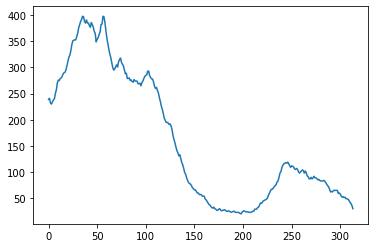

In [20]:
#df_features.plot.scatter(x ='TOTAL_VACCINATED', y  = 'death_count_7day_avg')
plt.plot(df_features['hosp_count_7day_avg'])

## Times Series Forecasting using Keras

## Defining values and test size

In this section of the script a time series forescasting model using stateful LSTM will be created to predict the number of deaths based on the vaccination and hospitalization. First, we must define the number of epochs, time steps and batch size. Batch size is usually around 60 and 80, so for this project 64 will be selected. The timestep will 20, since the data series is not very long so the time windown doesn't need to be very large. And finally, 80 epochs of training are going to be used.

In [21]:
# defining the batch size and number of epochs
batch_size = 64
epochs = 400
timesteps = 10

With stateful LSTMs the trainings-set size must be divisible without remainder by the batch-size (modulo = 0)

In [22]:
def get_train_length(dataset, batch_size, test_percent):
    # substract test_percent to be excluded from training, reserved for testset
    length = len(dataset)
    length *= 1 - test_percent
    print(length)
    train_length_values = []
    for x in range(int(length) - 100,int(length)): 
        modulo=x%batch_size
        if (modulo == 0):
            train_length_values.append(x)
            #print(x)
    return (max(train_length_values))

The length for the training will be printed after next cell

In [23]:
length = get_train_length(df_features, batch_size, 0.2)
print(length)

251.20000000000002
192


To define the lower and upper boundaries for the training data. First, will the length defined in the cell above and add two times the timesteps, that will define a length that can accomadate the time window of analysis.

In [24]:
#Adding timesteps * 2
upper_train = length + timesteps*2
df_data_1_train = df_features[0:upper_train]
print(df_data_1_train.iloc[:,6:7])
training_set = df_data_1_train.iloc[:,6:7].values
training_set.shape

     hosp_count_7day_avg
0                  239.0
1                  241.0
2                  232.0
3                  230.0
4                  234.0
..                   ...
207                 23.0
208                 23.0
209                 24.0
210                 25.0
211                 25.0

[212 rows x 1 columns]


(212, 1)

## Preparing the data

The data before going to the Deep Learning model must be scaled between 0 and 1. For that, the function MinMaxScaler from the scikit-learn framework will imported.

In [25]:
# Feature Scaling
#scale between 0 and 1. the weights are esier to find.
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(np.float64(training_set))
training_set_scaled.shape

(212, 1)

The data need to be transformed into a tensor before beign used to train the deep learning model. To achieve that, first, a matrix with the size length by timesteps is formed by moving the window with the timesteps size and appending those values into a matrix, this step repeat number of times defined by the length variable. 

In [26]:
X_train = []
y_train = []

# Creating a data structure with n timesteps

print(length + timesteps)
for i in range(timesteps, length + timesteps): 
    X_train.append(training_set_scaled[i-timesteps:i,0])
    y_train.append(training_set_scaled[i:i+timesteps,0])

print(len(X_train))
print(len(y_train))
#create X_train matrix
#30 items per array (timestep) 
print(X_train[0:2])
print(np.array(X_train).shape)
#create Y_train matrix
#30 items per array (timestep) 
print(y_train[0:2])
print(np.array(y_train).shape)

202
192
192
[array([0.57936508, 0.58465608, 0.56084656, 0.55555556, 0.56613757,
       0.57671958, 0.58201058, 0.60846561, 0.62698413, 0.66137566]), array([0.58465608, 0.56084656, 0.55555556, 0.56613757, 0.57671958,
       0.58201058, 0.60846561, 0.62698413, 0.66137566, 0.67724868])]
(192, 10)
[array([0.67724868, 0.67460317, 0.68518519, 0.68783069, 0.6957672 ,
       0.70899471, 0.71428571, 0.71693122, 0.73015873, 0.75132275]), array([0.67460317, 0.68518519, 0.68783069, 0.6957672 , 0.70899471,
       0.71428571, 0.71693122, 0.73015873, 0.75132275, 0.77248677])]
(192, 10)


After selecting the data to be transformed, it must reshaped into a 3 dimensional tensor.

In [27]:
# Reshaping
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
y_train = np.reshape(y_train, (y_train.shape[0], y_train.shape[1], 1))
print(X_train.shape)
print(y_train.shape)

(192, 10, 1)
(192, 10, 1)


## Defining the model

The script in this cell will be responsible for initializing the LSTM model for time series forecasting. The first layer will be input layer where the only configuration will be the batch_shape, composed byb the batch size and the timesteps. 
For the second and third layers the imput will be the layers prior, the second will be the first and the input for the third will be second. And both will configures to be stateful and have 40 cells.
The last layer will the output layer that will a dense unit with one output.

In [28]:
# Initialising the LSTM Model with MAE Loss-Function
# Using Functional API

inputs_1_mae = Input(batch_shape=(batch_size,timesteps,1))
#each layer is the input of the next layer
lstm_1_mae = LSTM(40, stateful=True, return_sequences=True)(inputs_1_mae)
lstm_2_mae = LSTM(40, stateful=True, return_sequences=True)(lstm_1_mae)

output_1_mae = Dense(units = 1)(lstm_2_mae)

regressor_mae = Model(inputs=inputs_1_mae, outputs = output_1_mae)

#adam is fast starting off and then gets slower and more precise
#mae -> mean absolute error loss function
regressor_mae.compile(optimizer='adam', loss = 'mae')
regressor_mae.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(64, 10, 1)]             0         
_________________________________________________________________
lstm (LSTM)                  (64, 10, 40)              6720      
_________________________________________________________________
lstm_1 (LSTM)                (64, 10, 40)              12960     
_________________________________________________________________
dense (Dense)                (64, 10, 1)               41        
Total params: 19,721
Trainable params: 19,721
Non-trainable params: 0
_________________________________________________________________


## Training the model

Now the model will be trained, since is a stateful timeseries forecasting model, only the states must be reseted, all else must be kept.

In [29]:
#Statefull
for i in range(epochs):
    #print("Epoch: " + str(i))
    #run through all data but the cell, hidden state are used for the next batch.
    regressor_mae.fit(X_train, y_train, shuffle=False, epochs = 1, batch_size = batch_size)
    #resets only the states but the weights, cell and hidden are kept.
    regressor_mae.reset_states()

3/3 [==============================] - 0s 32ms/step - loss: 0.0740


## Defining the test data

The next 3 cells will for defining the lower and upper boundaries for the test data.

In [50]:
def get_test_length(dataset, batch_size):
    
    test_length_values = []
    for x in range(len(dataset) - 200, len(dataset) - timesteps*2): 
        modulo=(x-upper_train)%batch_size
        if (modulo == 0):
            test_length_values.append(x)
            #print(x)
    return (max(test_length_values))

In [51]:
test_length = get_test_length(df_features, batch_size)
print(test_length)
upper_test = test_length + timesteps*2
testset_length = test_length - upper_train
#print(test_length)
print(upper_train)
print(testset_length)

276
212
64


In [52]:
print(upper_train, upper_test, len(results_df))

212 296 603


## Prepating the data for testing

Define which part of the data set will become the test data.

In [53]:
# construct test set
#subsetting
df_data_1_test = df_features[upper_train:upper_test] 
#print(df_data_1_test)
test_set = df_data_1_test.iloc[:,6:7].values
#print(df_data_1_test.iloc[:,8:9])

As for the training, the data used for the testing must be scaled and transformed into a 3D tensor before being used by the model.

In [54]:
#scaling
scaled_real_bcg_values_test = sc.fit_transform(np.float64(test_set))
print(scaled_real_bcg_values_test.shape)

#creating input data
X_test = []
for i in range(timesteps, testset_length + timesteps):
    X_test.append(scaled_real_bcg_values_test[i-timesteps:i, 0])
X_test = np.array(X_test)

print(X_test.shape)
#reshaping
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

(84, 1)
(64, 10)


In [55]:
X_test.shape

(64, 10, 1)

## Prediction and Indicators

Then the model is used to predict the values. The result must be reshaped to a list of 2 values tuples. Since the data before going into the model was fited between 0 and 1, the result must be reversed back into it's original range. And to finalyze the process, there are excess values in set because of the window of the timestep that was added. To correct that, it just need to select the data into range of the test set length.

In [56]:
#prediction
predicted_bcg_values_test_mae = regressor_mae.predict(X_test, batch_size=batch_size)
regressor_mae.reset_states()

print(predicted_bcg_values_test_mae.shape)

#reshaping
predicted_bcg_values_test_mae = np.reshape(predicted_bcg_values_test_mae, 
                                       (predicted_bcg_values_test_mae.shape[0], 
                                        predicted_bcg_values_test_mae.shape[1]))

print(predicted_bcg_values_test_mae.shape)
#inverse transform
predicted_bcg_values_test_mae = sc.inverse_transform(predicted_bcg_values_test_mae)


#creating y_test data
y_test = []
for j in range(0, testset_length - timesteps):
    y_test = np.append(y_test, predicted_bcg_values_test_mae[j, timesteps-1])

# reshaping
y_test = np.reshape(y_test, (y_test.shape[0], 1))

print(y_test.shape)

(64, 10, 1)
(64, 10)
(54, 1)


This print is just for debugging.

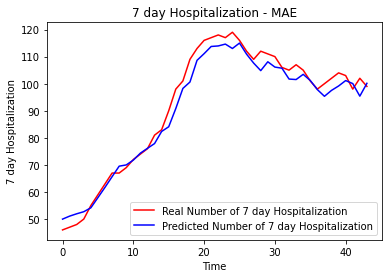

In [57]:
# Visualising the results
plt.plot(test_set[timesteps:len(y_test)].astype(float), color = 'red', label = 'Real Number of 7 day Hospitalization')
plt.plot(y_test[0:len(y_test) - timesteps].astype(float), color = 'blue', label = 'Predicted Number of 7 day Hospitalization')
plt.title('7 day Hospitalization - MAE')
plt.xlabel('Time')
plt.ylabel('7 day Hospitalization')
plt.legend()
plt.show()

Since the model was trained using Mean Absolute Error was the cost function to be optimized, in this project I will also use the Men Absolute Error as a metric to meausure performance.

In [70]:
# Mean absolute error regression loss
from sklearn.metrics import mean_absolute_error

MAE_LSTM = mean_absolute_error(test_set[timesteps:len(y_test)], y_test[0:len(y_test) - timesteps])

print("Mean Absolute Error for Deep Learning Model")
print(MAE_LSTM)

Mean Absolute Error for Deep Learning Model
2.9636906710538


# Non Deep Learning model - Polynomial Regression

One of the objectives of this project it is to compare between a non Deep Learning model and Deep learning model. As a non Deep Learning, the one selected was the Polynomial Regression. The steps to create, train and test the model are as follow.

## Importing the libraries

In [59]:
# Generate polynomial and interaction features
from sklearn.preprocessing import PolynomialFeatures
# Ordinary least squares Linear Regression
from sklearn.linear_model import LinearRegression
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split

## Prepating data

The data will be splited into training and test data with 80% for training and 20% for testing.

(63, 1)


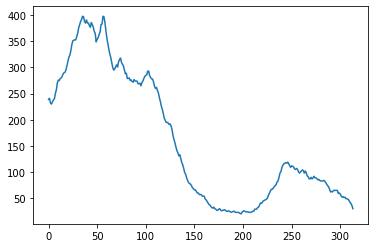

In [64]:
# Split the data in 80% training and 20% testing
X_train,X_test, Y_train, Y_test = train_test_split(df_features.iloc[:,9:10].values,df_features.iloc[:,6:7].values,test_size = 0.2)
# Print the shapes of the dataframes
print(X_test.shape)
plt.plot(df_features.iloc[:,6:7])

## Creating and training model

An eigth order polynomial model is created using the PolynomialFeatures method from sklearn.preprocessing framework. Then both the training and test data for the independent variable are transformed into linear representations of eigth order polynomial function.

In [65]:
# First, a polynomial model is created
poly_reg = PolynomialFeatures(degree=6)
# The X axis is transformed so it can be used in a linear regression model
X_poly = poly_reg.fit_transform(X_train)
# Bothe the trains and test data will be transformed
X_poly_test = poly_reg.fit_transform(X_test)

## Prediction Stage and Indicators

For predicting future values, first a linear model is created, then this model is fited with the transformed data from the cell prior to this one. The method predict from model is used to calculate yhat. A plot is done to compare the test data and predicted value.

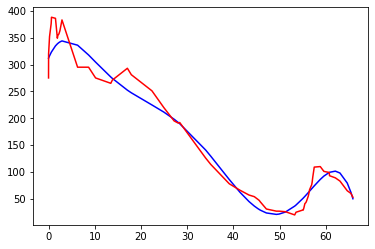

In [68]:
# Create a linear regression model
lin_reg2 = LinearRegression()
# Fit the model using the linear model and the transformed data
lin_reg2.fit(X_poly,Y_train)
# Print the score
#print(lin_reg2.score(X_poly_test,Y_test))
# Use the model to predict the the values using the test data
yhat = lin_reg2.predict(X_poly_test)
# Plot both curves for comparision
#plt.scatter(X_test,Y_test, color = 'red')
#plt.plot(X_test,yhat, color = 'blue')
xs, ys = zip(*sorted(zip(X_test, yhat)))
plt.plot(xs,ys, color = 'blue')
xs_2, ys_2 = zip(*sorted(zip(X_test, Y_test)))
plt.plot(xs_2,ys_2, color = 'red')

The Mean Absolute error is calculated between the test and predicted value.

In [69]:
MAE_Poly = mean_absolute_error(Y_test, yhat)

print("Mean Average Error for the Non Deep Learning model")
print(MAE_Poly)

Mean Average Error for the Non Deep Learning model
17.74905368178241
